In [1]:
import os
import sys
__dir__ = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(__dir__)
sys.path.insert(0, os.path.abspath(os.path.join(__dir__, "..")))

In [7]:
from image_processing_vit import CharImageProcessor
import load_model

import random
import os
from PIL import Image
from load_model import CharacterRecognition

In [10]:
character_ascii_path = "../resources/character_ascii.json"
checkpoint_path = "../checkpoints/wavemix_v1.pt"
model = CharacterRecognition(
    character_ascii_path=character_ascii_path,
    checkpoint_path = checkpoint_path,
    gpu_id=0,
    fixed_size=64
)

[INFO] Initialize Character Recognition model (WaveMix) successfully!


In [24]:
if True:
    import matplotlib.pyplot as plt
    from PIL import Image
    import cv2
    import numpy as np
    image_processor = CharImageProcessor(do_normalize=True, do_rescale=True, do_resize=True, image_mean=[0.5,0.5,0.5],
                                    image_std = [0.5,0.5,0.5], resample=2, size=384,
                                    )
    # res = image_processor.create_char_images(np.random.rand(3, 488,512))
    # image = Image.open("/home/app/ocr/kientdt/CharOCR/test_images/GSK3.png").convert("RGB")
    # image = cv2.imread("/data/ocr/data/text_recognition/ocr_data_v3_280225/Arial_Bold/images/img_1.jpg")
    # image1 = cv2.imread("/home/app/ocr/kientdt/CharOCR/test_images/GSK2.png")
    # image = np.transpose(image, (2,0,1))
    # image1 = np.transpose(image1, (2,0,1))
    device = 'cuda'
    image_path = "/data/ocr/data/text_recognition/ocr_data_v3_280225/Arial_Bold/images/img_12298.jpg"
    # image = Image.open(image_path).convert("RGB")
    image = cv2.imread(image_path)
    pixel_values = image_processor(image, return_tensors="pt").pixel_values.to(device)
    print(pixel_values.shape)

False
torch.Size([25, 3, 64, 64])


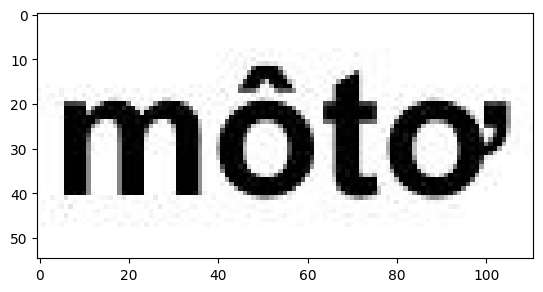

In [25]:
plt.imshow(image)

torch.Size([25, 3, 64, 64])


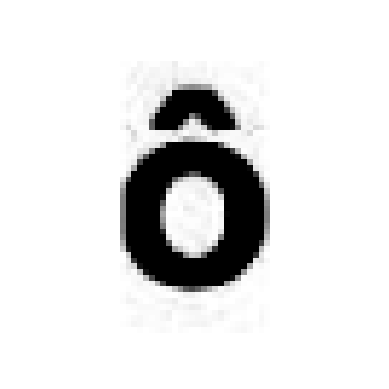

In [26]:
image = pixel_values.squeeze(0)  
print(image.shape)
# Convert to NumPy array and move channels to last dimension: (16, 480, 3)
image = image.permute(0, 2, 3, 1).cpu().numpy()

# Ensure values are in [0,1] for proper display
image = np.clip(image, 0, 1)

# Display the image
plt.imshow(image[1])
plt.axis("off")  # Hide axes
plt.savefig("test.png")
plt.show()


In [27]:
model((pixel_values), topk=1)

[[('m', 0.9999882)],
 [('ô', 0.9982558)],
 [('t', 0.9999864)],
 [('ơ', 0.99974364)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)],
 [('_', 0.83607227)]]